In [1]:
import pandas as pd

# Load your dataset
df = pd.read_csv("/kaggle/input/dataset/XLMRoberta_English_embeddings_LLMdetect.csv")  # replace with your filename
print(df.head())

                                                text  label  \
0  Car-free cities have become a subject of incre...      1   
1  Car Free Cities  Car-free cities, a concept ga...      1   
2    A Sustainable Urban Future  Car-free cities ...      1   
3    Pioneering Sustainable Urban Living  In an e...      1   
4    The Path to Sustainable Urban Living  In an ...      1   

                                        cleaned_text  \
0  carfree city become subject increasing interes...   
1  car free city carfree city concept gaining tra...   
2  sustainable urban future carfree city emerging...   
3  pioneering sustainable urban living era marked...   
4  path sustainable urban living age rapid urbani...   

                              XLMRoberta2_embeddings  
0  [ 8.47269520e-02  7.20160678e-02  5.51198646e-...  
1  [ 8.55521038e-02  7.06822053e-02  5.73787615e-...  
2  [ 8.00648257e-02  7.35276416e-02  5.73213696e-...  
3  [ 8.57378021e-02  7.86311328e-02  5.62351868e-...  
4  [ 9.10

In [2]:
# Number of rows you want per label
n_samples = 2500

# Sample rows for each label
df_human = df[df['label'] == 0].sample(n=n_samples, random_state=42)
df_ai = df[df['label'] == 1].sample(n=n_samples, random_state=42)

# Combine them into a single dataset
df_combined = pd.concat([df_human, df_ai]).reset_index(drop=True)

# Shuffle the combined dataset
df_combined = df_combined.sample(frac=1, random_state=42).reset_index(drop=True)

# Save to a new CSV
df_combined.to_csv("XlmRoberta_English_dataset_balanced.csv", index=False)

# Check the counts to confirm balance
print(df_combined['label'].value_counts())

label
0    2500
1    2500
Name: count, dtype: int64


In [3]:
print(df_combined.head())

                                                text  label  \
0  The process begins when the computer construct...      0   
1  \nWhen it comes to advice and wisdom, listenin...      1   
2  There are many people who think that animals s...      1   
3  Imagine being able to detect how other people ...      0   
4  In cities such as Vauban, Paris, and Bogota, p...      0   

                                        cleaned_text  \
0  process begin computer construct computer mode...   
1  come advice wisdom listening elder incredibly ...   
2  many people think animal treated pet people be...   
3  imagine able detect people feeling even trying...   
4  city vauban paris bogota people getting seriou...   

                              XLMRoberta2_embeddings  
0  [ 5.62172681e-02  8.84449780e-02  6.58054575e-...  
1  [ 7.67848641e-02  1.14073060e-01  4.41924185e-...  
2  [ 4.93398756e-02  6.56239912e-02  4.65359576e-...  
3  [ 3.72375101e-02  9.03443843e-02  5.88569790e-...  
4  [ 9.28

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/kaggle/working/XlmRoberta_English_dataset_balanced.csv")


In [6]:
# Convert space-separated embedding strings to numpy arrays
def str_to_array(s):
    s = s.strip("[]")  # remove brackets
    return np.array([float(x) for x in s.split()])

df['XLMRoberta2_embeddings'] = df['XLMRoberta2_embeddings'].apply(str_to_array)

# Features and labels
X = np.array(df['XLMRoberta2_embeddings'].tolist())
y = df['label']

# Train-validation split (80/20)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [8]:
# Initialize Logistic Regression
clf = LogisticRegression(max_iter=500, solver='saga')

# Train the model
clf.fit(X_train, y_train)

# Predictions
y_train_pred = clf.predict(X_train)
y_val_pred = clf.predict(X_val)

In [9]:
# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
print("Training Accuracy:", train_acc)
print("Validation Accuracy:", val_acc)

# Classification report
print("\nValidation Classification Report:\n", classification_report(y_val, y_val_pred))


Training Accuracy: 0.96675
Validation Accuracy: 0.977

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       500
           1       0.97      0.99      0.98       500

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



In [10]:
# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_val_pred))



Confusion Matrix:
 [[484  16]
 [  7 493]]


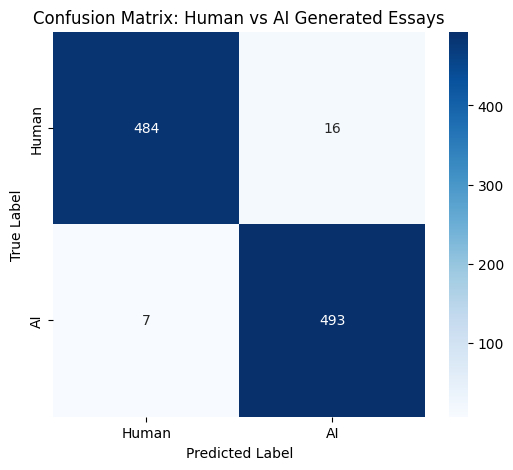

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Confusion matrix values directly
cm_values = np.array([[484, 16],
                      [7, 493]])

# Class labels
labels = ["Human", "AI"]

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm_values, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix: Human vs AI Generated Essays")
plt.show()


In [12]:
from sklearn.metrics import log_loss

# Compute approximate log loss
train_loss = log_loss(y_train, clf.predict_proba(X_train))
val_loss = log_loss(y_val, clf.predict_proba(X_val))
print("\nTraining Loss:", train_loss)
print("Validation Loss:", val_loss)


Training Loss: 0.19240515401788916
Validation Loss: 0.17895477524230466


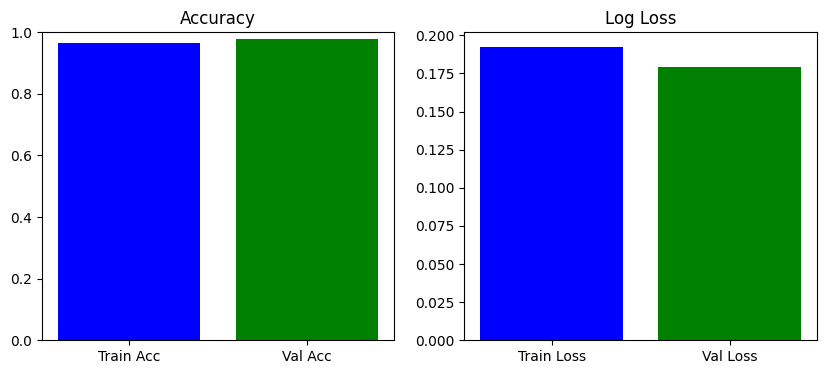

In [13]:
# Plot Accuracy and Loss
plt.figure(figsize=(10,4))

# Accuracy bar
plt.subplot(1,2,1)
plt.bar(['Train Acc','Val Acc'], [train_acc, val_acc], color=['blue','green'])
plt.title('Accuracy')
plt.ylim(0,1)

# Loss bar
plt.subplot(1,2,2)
plt.bar(['Train Loss','Val Loss'], [train_loss, val_loss], color=['blue','green'])
plt.title('Log Loss')

plt.show()